# Imports


In [128]:
# Imports
from utilities import showStaticMap, getColoredInitialMap, getBinaryInitialMap, getInitialRobotPose, showAnimatedMap
from utilities import  getRays, getLikelihood, getLikelihoodParallel
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Markdown

In [129]:
# Constants
LASER_ANGLE_RANGE = 125 # to the left and the right(in degrees)
NUMBER_OF_LASER_RAYS = 2 * LASER_ANGLE_RANGE // 2 # 2 degrees per ray
LASER_MAX_RANGE = 1200//4 # (in pixels)
PIXEL_WIDTH = 4
PIXEL_HIGHT = 4
MAP_SIZE = (400, 680) # where the first dimension if for the y-axis and the second dimension (in pixels)

# Show the laser beams based on the robot's pose


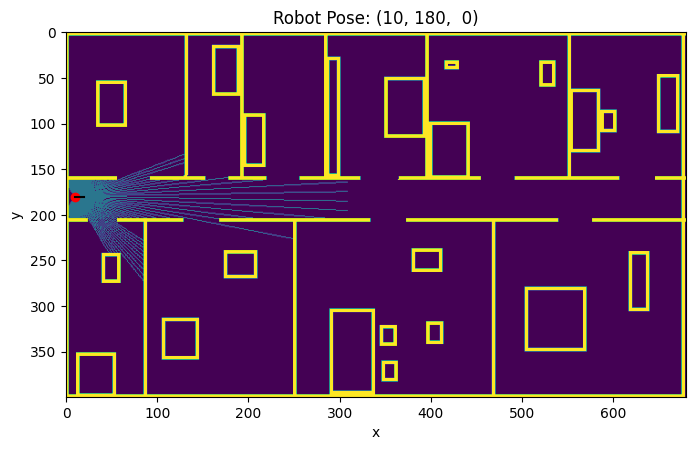

In [130]:
showStaticMap(getColoredInitialMap(), getInitialRobotPose())

# Get the laser beams based on the robot's pose

In [131]:
rays = getRays(getColoredInitialMap(), (20, 20, 0))
print(rays)
# output the measurements to measurements.txt
np.savetxt('results/measurements.txt', rays, fmt='%d')

[20, 20, 19, 19, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 24, 25, 26, 27, 28, 30, 32, 34, 36, 38, 41, 45, 50, 55, 62, 72, 84, 103, 111, 111, 111, 111, 111, 111, 111, 111, 112, 113, 113, 114, 116, 117, 118, 120, 122, 124, 126, 129, 132, 135, 55, 53, 51, 49, 47, 46, 44, 43, 42, 41, 40, 39, 38, 38, 37, 36, 37, 40, 45, 51, 58, 69, 84, 140, 139, 139, 139, 139, 139, 139, 140, 109, 90, 76, 66, 59, 53, 48, 44, 41, 38, 36, 34, 32]


# Calculate the likelihood filed of the laser beams
Use `getLikelihood()` for the normal processing and `getLikelihoodParallel()` for the parallel processing.

Calculating Likelihood: 100%|██████████| 20/20 [00:15<00:00,  1.25it/s]


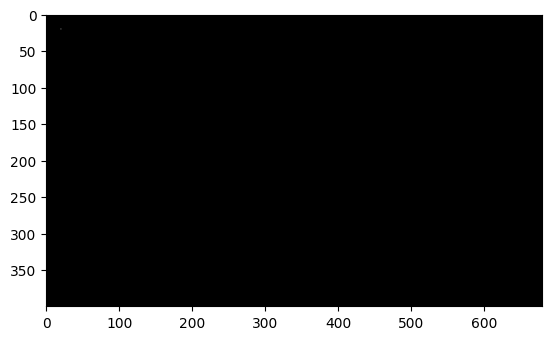

In [132]:
likelihood = getLikelihoodParallel(getBinaryInitialMap(), rays)
normalizedLikelihood = likelihood/np.max(likelihood) # normalize the likelihood
#######################################################
# Save the likelihood to likelihood.txt
np.savetxt('results/likelihood.txt', likelihood, fmt='%d')
np.savetxt('results/normalizedLikelihood.txt', normalizedLikelihood, fmt='%d')
plt.imshow(normalizedLikelihood, cmap='gray')
plt.show()

# Apply erosion and dilation to the likelihood field

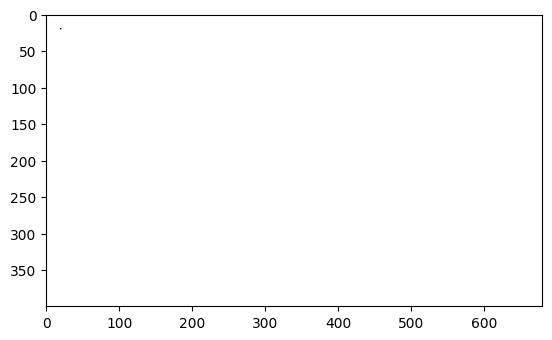

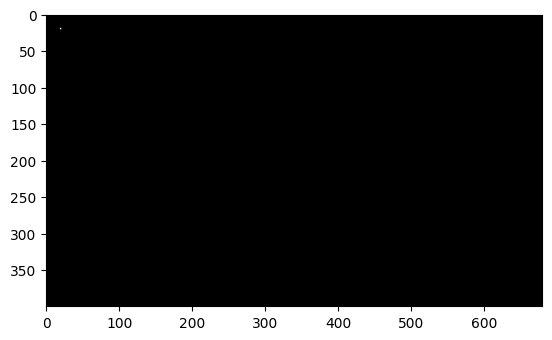

In [133]:
from skimage.morphology import dilation, erosion 
kernel = np.ones((2,2),np.uint8)

# apply erosion to the map with a nxn kernel using skimage
newLikelihood = erosion(1 - normalizedLikelihood, kernel)
plt.imshow(newLikelihood, cmap='gray')
plt.show()
# apply dilation the map with a nxn kernel using skimage
newLikelihood = dilation(normalizedLikelihood, kernel)
plt.imshow(newLikelihood, cmap='gray')
plt.show()

# Show the likelihood embedded in the map

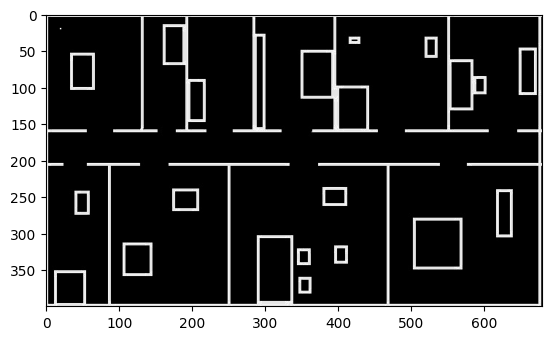

In [134]:
# Show the likelihood embedded in the map
likelihoodInMap = getBinaryInitialMap() + newLikelihood
plt.imshow(likelihoodInMap, cmap='gray')
plt.show()